In [20]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load the cleaned dataset

states_cov = pd.read_csv('data/states_hic_cleaned.csv')
states_cov.head()

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),Health Insurance Coverage Change (2010-2015),Employer Health Insurance Coverage (2015),Marketplace Health Insurance Coverage (2016),Marketplace Tax Credits (2016),Average Monthly Tax Credit (2016),State Medicaid Expansion (2016),Medicaid Enrollment (2013),Medicaid Enrollment (2016),Medicaid Enrollment Change (2013-2016),Medicare Enrollment (2016)
0,Alabama,14.6,10.1,-4.5,215000,2545000,165534,152206,310.0,False,799176.0,910775,111599.0,989855
1,Alaska,19.9,14.9,-5.0,36000,390000,17995,16205,750.0,True,122334.0,166625,44291.0,88966
2,Arizona,16.9,10.8,-6.1,410000,3288000,179445,124346,230.0,True,1201770.0,1716198,514428.0,1175624
3,Arkansas,17.5,9.5,-8.0,234000,1365000,63357,56843,306.0,True,556851.0,920194,363343.0,606146
4,California,18.5,8.6,-9.9,3826000,19552000,1415428,1239893,309.0,True,7755381.0,11843081,4087700.0,5829777


In [8]:
# Extract relevant columns for uninsured rates analysis

states_uninsured_rates = (
            states_cov[
                    ['State',
                    'Uninsured Rate (2010)',
                    'Uninsured Rate (2015)',
                    'Uninsured Rate Change (2010-2015)',
                    'State Medicaid Expansion (2016)']
                    ]
)
states_uninsured_rates.head()

,State,Uninsured Rate (2010),Uninsured Rate (2015),Uninsured Rate Change (2010-2015),State Medicaid Expansion (2016)
0,Alabama,14.6,10.1,-4.5,False
1,Alaska,19.9,14.9,-5.0,True
2,Arizona,16.9,10.8,-6.1,True
3,Arkansas,17.5,9.5,-8.0,True
4,California,18.5,8.6,-9.9,True


##### States with Highest and Lowest Uninsured Rates in 2010 and 2015

In [56]:
# Identify the top 10 states with the highest uninsured rates in 2010 and in 2015

top_uninsured_2010 = (
    states_uninsured_rates[['State','Uninsured Rate (2010)']]
    .sort_values(by='Uninsured Rate (2010)', ascending=False)
    .head(10)
)
print(f"The states with top uninsured rates in 2010: \n\n {top_uninsured_2010.to_string(index=False)}\n\n")

top_uninsured_2015 = (
    states_uninsured_rates[['State','Uninsured Rate (2015)']]
    .sort_values(by='Uninsured Rate (2015)', ascending=False)
    .head(10)
)
print(f"The states with top uninsured rates in 2015: \n\n {top_uninsured_2015.to_string(index=False)}")

The states with top uninsured rates in 2010: 

       State  Uninsured Rate (2010)
      Texas                   23.7
     Nevada                   22.6
    Florida                   21.3
     Alaska                   19.9
    Georgia                   19.7
 New Mexico                   19.6
   Oklahoma                   18.9
 California                   18.5
Mississippi                   18.2
  Louisiana                   17.8


The states with top uninsured rates in 2015: 

       State  Uninsured Rate (2015)
      Texas                   17.1
     Alaska                   14.9
   Oklahoma                   13.9
    Georgia                   13.9
    Florida                   13.3
Mississippi                   12.7
     Nevada                   12.3
  Louisiana                   11.9
    Montana                   11.6
    Wyoming                   11.5


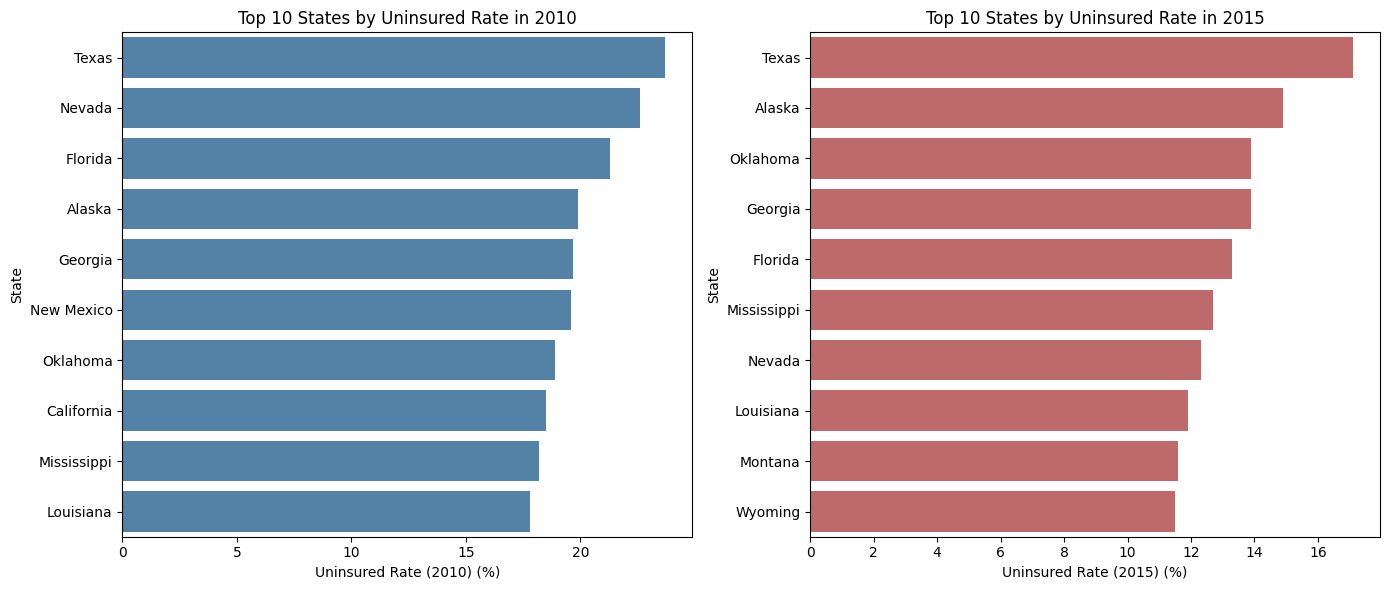

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=False)

# Left: Top 10 states by uninsured rate in 2010
sns.barplot(
    data=top_uninsured_2010.sort_values("Uninsured Rate (2010)", ascending=False),
    x="Uninsured Rate (2010)",
    y="State",
    ax=axes[0],
    color="steelblue"
)
axes[0].set_title("Top 10 States by Uninsured Rate in 2010")
axes[0].set_xlabel("Uninsured Rate (2010) (%)")
axes[0].set_ylabel("State")

# Right: Top 10 states by uninsured rate in 2015
sns.barplot(
    data=top_uninsured_2015.sort_values("Uninsured Rate (2015)", ascending=False),
    x="Uninsured Rate (2015)",
    y="State",
    ax=axes[1],
    color="indianred"
)
axes[1].set_title("Top 10 States by Uninsured Rate in 2015")
axes[1].set_xlabel("Uninsured Rate (2015) (%)")
axes[1].set_ylabel("State")

plt.tight_layout()
plt.show()

###### Although uninsured rates fell for the worst‑affected states between 2010 and 2015, many of the same states remained at the top of the uninsured ranking in 2015. Texas, Nevada, Florida, Georgia, Mississippi, and Louisiana appear in both lists, indicating that even after ACA implementation these states continued to struggle with relatively high levels of people lacking coverage. This suggests that national reforms alone were not enough to close pre‑existing coverage gaps in these states and that additional, state‑specific policies or outreach efforts would likely be needed to bring their uninsured rates closer to the national average.

In [60]:
# Identify the least 10 states with the lowest uninsured rates in 2010 and in 2015

least_uninsured_2010 = (
    states_uninsured_rates[['State','Uninsured Rate (2010)']]
    .sort_values(by='Uninsured Rate (2010)', ascending=True)
    .head(10)
)
print(f"The states with least uninsured rates in 2010: \n\n {least_uninsured_2010.to_string(index=False)}\n\n")

least_uninsured_2015 = (
    states_uninsured_rates[['State','Uninsured Rate (2015)']]
    .sort_values(by='Uninsured Rate (2015)', ascending=True)
    .head(10)
)
print(f"The states with least uninsured rates in 2015: \n\n {least_uninsured_2015.to_string(index=False)}")

The states with least uninsured rates in 2010: 

                State  Uninsured Rate (2010)
       Massachusetts                    4.4
District of Columbia                    7.6
              Hawaii                    7.9
             Vermont                    8.0
           Minnesota                    9.1
         Connecticut                    9.1
                Iowa                    9.3
           Wisconsin                    9.4
            Delaware                    9.7
        North Dakota                    9.8


The states with least uninsured rates in 2015: 

                State  Uninsured Rate (2015)
       Massachusetts                    2.8
District of Columbia                    3.8
             Vermont                    3.8
              Hawaii                    4.0
           Minnesota                    4.5
                Iowa                    5.0
        Rhode Island                    5.7
           Wisconsin                    5.7
            Delawa

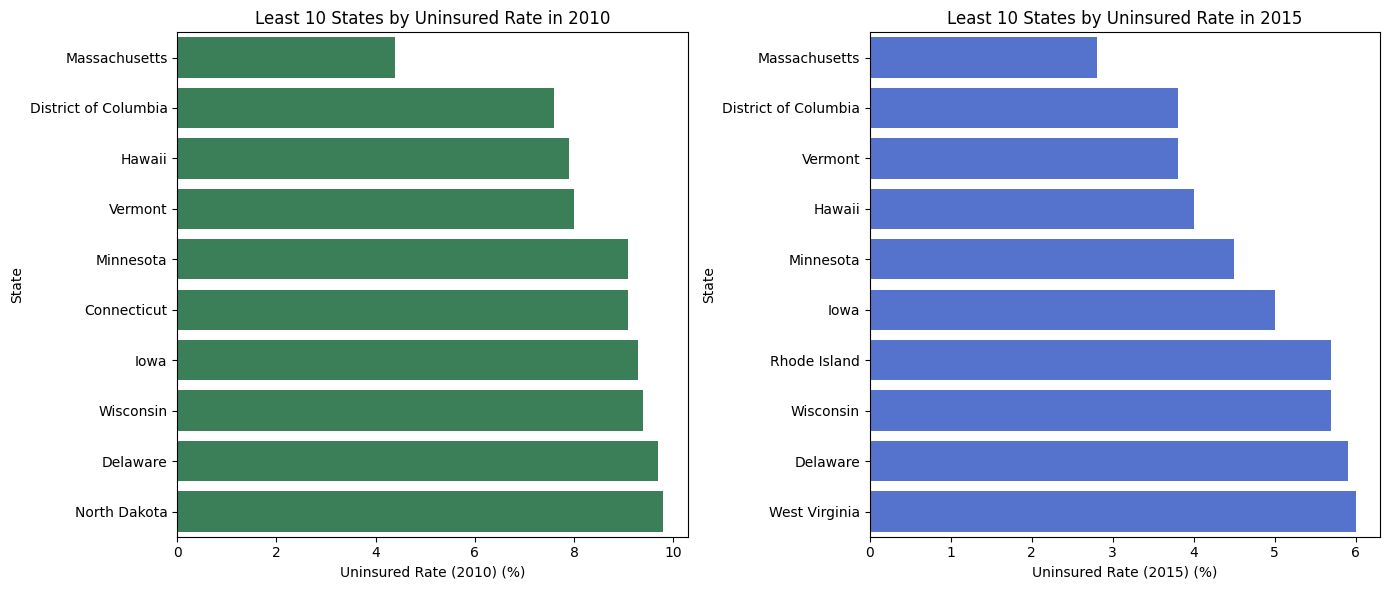

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=False)

# Left: 10 states with the lowest uninsured rates in 2010
sns.barplot(
    data=least_uninsured_2010.sort_values("Uninsured Rate (2010)", ascending=True),
    x="Uninsured Rate (2010)",
    y="State",
    ax=axes[0],
    color="seagreen"
)
axes[0].set_title("Least 10 States by Uninsured Rate in 2010")
axes[0].set_xlabel("Uninsured Rate (2010) (%)")
axes[0].set_ylabel("State")

# Right: 10 states with the lowest uninsured rates in 2015
sns.barplot(
    data=least_uninsured_2015.sort_values("Uninsured Rate (2015)", ascending=True),
    x="Uninsured Rate (2015)",
    y="State",
    ax=axes[1],
    color="royalblue"
)
axes[1].set_title("Least 10 States by Uninsured Rate in 2015")
axes[1].set_xlabel("Uninsured Rate (2015) (%)")
axes[1].set_ylabel("State")

plt.tight_layout()
plt.show()

###### States with the lowest uninsured rates in 2010 maintained and even improved their strong coverage positions by 2015. Massachusetts, the District of Columbia, Hawaii, Vermont, Minnesota, Iowa, Wisconsin, Delaware, and others appear in the low‑uninsured group across both years, and their uninsured rates generally fall further between 2010 and 2015. This suggests that states starting from relatively high coverage levels still benefitted from the ACA period, pushing uninsured rates even closer to universal coverage and providing useful benchmarks for what lower‑uninsured targets might look like for higher‑uninsured states.